In [1]:
""" Classification Homework for Python for Machine Learning
    Data source: https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results
    Warren Watts 12/7/2018
"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        del line_split[2:4]
        for i in range(len(line_split)):
            line_split[i] = int(line_split[i])
        data_array.append(line_split)
    file_open.close()
    return data_array

# function to get hero names for hero columns
def read_heroes(filename="heroes.json"):
    heroes = open(filename, "r")
    hero_dict = {}
    name = None
    for line in iter(heroes):
        line1 = line.strip()
        line2 = line1.strip(',')
        if line2.startswith('"name":'):
            name = line2[8:].strip('"')
        if line2.startswith('"id":'):
            hero_dict[int(line2[6:])] = name
    return hero_dict

In [3]:
# read in data and column names
dota = read_file("dota2Train.csv")
print(dota[:2])
print(len(dota[0]))
hero_map = read_heroes()
print(hero_map)

[[-1, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, -1, 0, 0, 0, -1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 152, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
115
{1: 'antimage', 2: 'axe', 3: 'bane', 4: 'bloodseeker', 5: 'crystal_maiden', 6: 'drow_ranger', 7: 'earthshaker', 8: 'juggernaut', 9: 'mirana', 11: 'nevermore', 10: 'morphling', 12: 'phantom_lancer', 13: 'puck', 14: 'pudge', 15: 'razor', 16: 'sand_king', 17: 'storm_spirit', 18: 'sven', 1

In [4]:
dota_header = ["result", "cluster"]
for i in range(113):
    dota_header.append(hero_map.get(i+1, "unknown"))
dota_df = pd.DataFrame(dota,columns=dota_header)
print(dota_df.iloc[:10,:20])
print(dota_df.iloc[:10,20:40])
print(dota_df.iloc[:10,40:60])
print(dota_df.iloc[:10,60:80])
print(dota_df.iloc[:10,80:100])
print(dota_df.iloc[:10,100:])


   result  cluster  antimage  axe  bane  bloodseeker  crystal_maiden  \
0      -1      223         0    0     0            0               0   
1       1      152         0    0     0            1               0   
2       1      131         0    0     0            1               0   
3       1      154         0    0     0            0               0   
4      -1      171         0    0     0            0               0   
5       1      122         0    1     0            0               0   
6       1      224         0    0     0            0               0   
7      -1      227         0   -1     0            0               0   
8      -1      111         0    0     1            0               0   
9      -1      151         0    0     0            1               0   

   drow_ranger  earthshaker  juggernaut  mirana  morphling  nevermore  \
0            0            0           0       0          1          0   
1           -1            0           0       0          0   

In [5]:
print(dota_df.iloc[:,:20].describe())
print(dota_df.iloc[:,20:40].describe())
print(dota_df.iloc[:,40:60].describe())
print(dota_df.iloc[:,60:80].describe())
print(dota_df.iloc[:,80:100].describe())
print(dota_df.iloc[:,100:].describe())

             result       cluster      antimage           axe          bane  \
count  92650.000000  92650.000000  92650.000000  92650.000000  92650.000000   
mean       0.053038    175.864145     -0.001630     -0.000971      0.000691   
std        0.998598     35.658214      0.402004      0.467672      0.165052   
min       -1.000000    111.000000     -1.000000     -1.000000     -1.000000   
25%       -1.000000    152.000000      0.000000      0.000000      0.000000   
50%        1.000000    156.000000      0.000000      0.000000      0.000000   
75%        1.000000    223.000000      0.000000      0.000000      0.000000   
max        1.000000    261.000000      1.000000      1.000000      1.000000   

        bloodseeker  crystal_maiden   drow_ranger   earthshaker    juggernaut  \
count  92650.000000    92650.000000  92650.000000  92650.000000  92650.000000   
mean      -0.000799       -0.002008      0.003173     -0.000345     -0.003832   
std        0.355393        0.329348      0.48

            huskar  night_stalker   broodmother  bounty_hunter        weaver  \
count  92650.00000   92650.000000  92650.000000   92650.000000  92650.000000   
mean       0.00014       0.000378     -0.000043       0.000486     -0.000324   
std        0.37034       0.218097      0.145448       0.370486      0.291896   
min       -1.00000      -1.000000     -1.000000      -1.000000     -1.000000   
25%        0.00000       0.000000      0.000000       0.000000      0.000000   
50%        0.00000       0.000000      0.000000       0.000000      0.000000   
75%        0.00000       0.000000      0.000000       0.000000      0.000000   
max        1.00000       1.000000      1.000000       1.000000      1.000000   

             jakiro      batrider          chen       spectre  \
count  92650.000000  92650.000000  92650.000000  92650.000000   
mean      -0.000237     -0.000205      0.000324     -0.001371   
std        0.195967      0.200836      0.092340      0.286424   
min       -1.000000

In [6]:
# drop columns with mean = 0 and std dev = 0
dota_df.drop(['unknown', 'abyssal_underlord'], axis=1)

# Convert dota data to numpy array
dataset = np.array(dota_df)
X = dataset[:,2:]
y = dataset[:,0]

In [7]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
# print(model.intercept_)
# print(model.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

         -1       0.59      0.51      0.55     43868
          1       0.61      0.68      0.64     48782

avg / total       0.60      0.60      0.60     92650

[[22534 21334]
 [15651 33131]]


In [8]:
def plot_cm(cm):   
    result = ["lose","win"]
    df_cm = pd.DataFrame(cm, index=result, columns=result)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu",linecolor="blue",linewidths=1.0)
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

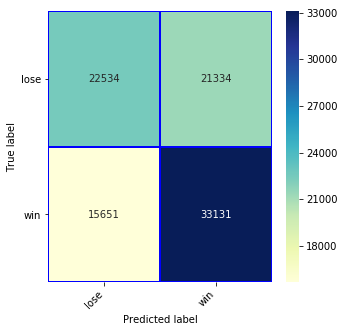

In [9]:
plot_cm(cm)

In [10]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

GaussianNB(priors=None)
             precision    recall  f1-score   support

         -1       0.55      0.52      0.54     43868
          1       0.59      0.62      0.60     48782

avg / total       0.57      0.57      0.57     92650

[[22962 20906]
 [18660 30122]]


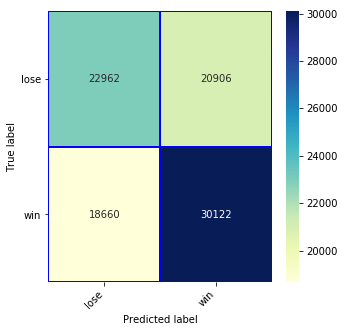

In [93]:
plot_cm(cm)

In [ ]:
# Knn- classification 
# data set to large and sparse for knn.
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [ ]:
plot_cm(cm)

In [11]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y
predicted = model.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

         -1       1.00      1.00      1.00     43868
          1       1.00      1.00      1.00     48782

avg / total       1.00      1.00      1.00     92650

[[43868     0]
 [    0 48782]]


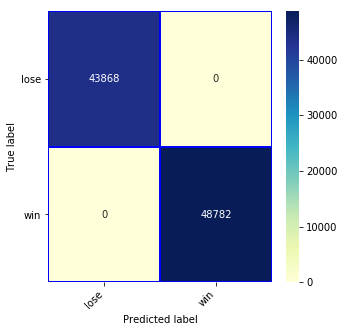

In [12]:
plot_cm(cm)